### PS6
### Yangyang Dai

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
biden = pd.read_csv('biden.csv')

In [3]:
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


#### (a)

In [4]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
biden_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

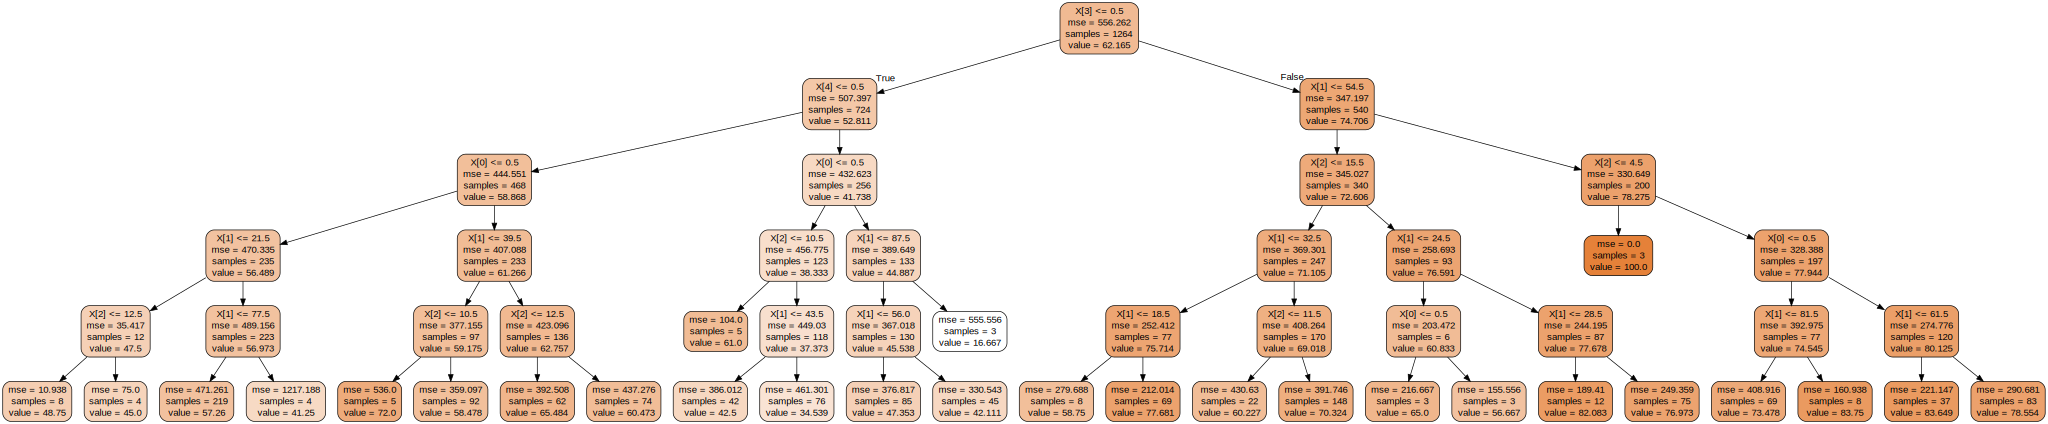

In [5]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    rounded=True,
    filled=True,
)
graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [6]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 406.672049146


We can see from above tree graph, the first node indicates a split between Democrats and non-Democrats. 

Democrats tend to like Biden more. For a Democrat, the next split is at the age of 54.5. People who are older than 54.5 tend to like Biden more. And of those people, women like Biden more, particularly those under the age 61.5.

For non-Democrats, the next split is whether or not one is Republican. Republicans tend to like Biden less than non-Republicans. Also, within Republicans, women tend to like Biden more. Within people who are neither Republicans nor Democrats, women tend to like Biden more, especially women over the age of 39.5. 

#### (b)

In [8]:
for d in range(1,20):
    biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
    biden_tree2.fit(X_train, y_train)
    y_pred2 = biden_tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred2)
    print('with max_depth {}, MSE ={}'.format(d, MSE2))

with max_depth 1, MSE =420.0224529349668
with max_depth 2, MSE =400.06539818418173
with max_depth 3, MSE =396.1937146321307
with max_depth 4, MSE =404.59602362340974
with max_depth 5, MSE =411.80592737244535
with max_depth 6, MSE =420.7201303515671
with max_depth 7, MSE =435.9428876302596
with max_depth 8, MSE =465.0669714073918
with max_depth 9, MSE =460.2495778071237
with max_depth 10, MSE =468.1591455224317
with max_depth 11, MSE =470.9931084565257
with max_depth 12, MSE =480.6369063941235
with max_depth 13, MSE =479.1048299246964
with max_depth 14, MSE =482.051775353099
with max_depth 15, MSE =481.5290396512368
with max_depth 16, MSE =480.7245051302462
with max_depth 17, MSE =482.9896985004119
with max_depth 18, MSE =480.87183478033825
with max_depth 19, MSE =482.66854241366775


In [9]:
biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3)
biden_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

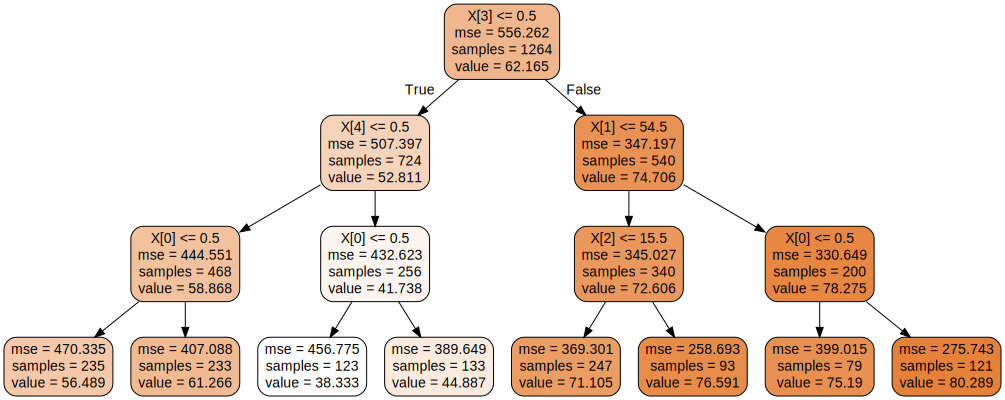

In [10]:
biden_tree_viz2 = export_graphviz(
    biden_tree2,
    out_file=None,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz2)
graph.render('biden_tree_viz2')
graph

The optimal level of trees is 3, with MSE 396.1937146321307
The pruned tree has reduced MSE， and the resulted graph is better presented.

#### (C)

In [12]:
from sklearn.ensemble import BaggingRegressor

In [13]:
biden_tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
biden_tree3.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [14]:
biden_tree3.score(X, y)
y_pred3 = biden_tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.000558395


In [15]:
importances = np.mean([
    tree.feature_importances_ for tree in biden_tree3.estimators_
], axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

Feature ranking:
1 .  female :  0.442912703961
2 .  age :  0.200576259716
3 .  dem :  0.190323544392
4 .  rep :  0.106028225513
5 .  educ :  0.060159266419


female is the variable that with the most importance in the tree model, followed by age and dem, followed by rep, and the last, educ.

#### (d)

In [16]:
from sklearn.ensemble import RandomForestRegressor

B=53
MSE_rf=[]
for m in range(3):
    print (f'm is {m+1}')
    temp = RandomForestRegressor(n_estimators=B, max_features=m+1, bootstrap=True,
                                  oob_score=True, random_state=25)
    temp.fit(X, y)

    temp.score(X, y)
    y_pred_rf = temp.oob_prediction_
    MSE = mean_squared_error(y, y_pred_rf)
    print('MSE=', MSE)
    MSE_rf.append(MSE)

# calculate variable importances
    importances = temp.feature_importances_
    std = np.std([tree.feature_importances_ for tree in temp.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # print the rankings of features
    
    print("Feature Ranking:")
    for f in range(len(features)):
        print(f'{f+1}. {features[f]}:,{importances[indices[f]]}')
    print()

m is 1
MSE= 538.323039782
Feature Ranking:
1. female:,0.5217927469927922
2. age:,0.1713135511547811
3. dem:,0.1496895941226878
4. rep:,0.1359043825432276
5. educ:,0.02129972518651136

m is 2
MSE= 539.564079727
Feature Ranking:
1. female:,0.5143102974424522
2. age:,0.18090644405234227
3. dem:,0.15367364292562752
4. rep:,0.13076353025316306
5. educ:,0.020346085326414954

m is 3
MSE= 536.607395689
Feature Ranking:
1. female:,0.48925354836121593
2. age:,0.20228598973438028
3. dem:,0.16922077182891992
4. rep:,0.11010334643594882
5. educ:,0.02913634363953492



We can see for the three m, 'female' remains the most important feature. And then followed by age, dem and rep, and lastly, educ is the least important. 
There is no particular relationship betwen m and MSE, while in this case, MSE is smallest with m=3.